<div align="center" style="margin: 30px 0;">
    <img src="https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png" width="200">
    
# 📈 Google Stock Prediction

### Machine Learning Model for GOOGL Stock Price Forecasting

---
**Project Objectives:**
- Analyze Google stock price patterns
- Build predictive regression model  
- Evaluate model performance with visualizations

</div>

In [1]:
# Importing the Library 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data

df = pd.read_csv('GOOG.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [5]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [6]:
df.shape

(1258, 14)

In [7]:
#checking the null valuse
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [8]:
df.dtypes

symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

In [9]:
# for satstical summary
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [10]:
# for inforamtion about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


<Axes: >

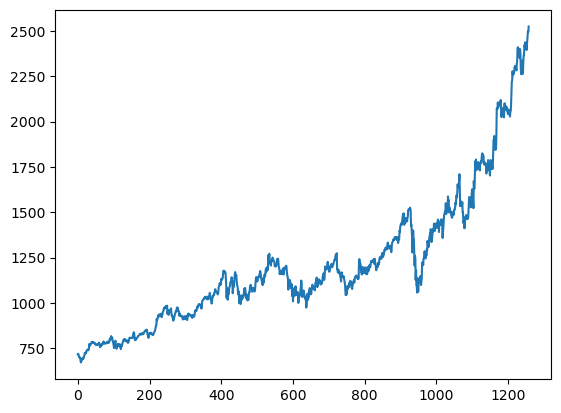

In [11]:
df['open'].plot()

<Axes: >

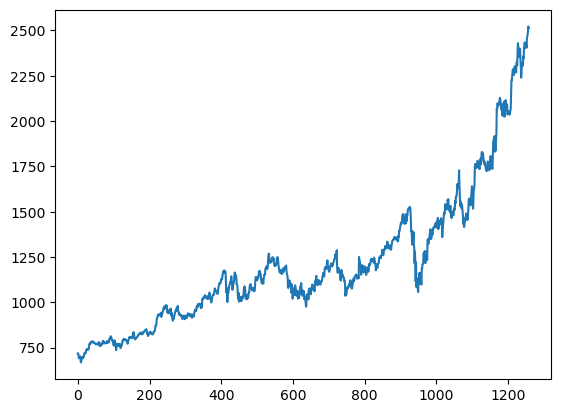

In [12]:
df['close'].plot()

In [44]:
# sns.pairplot(df)
# plt.show()

In [14]:
df.drop(columns='symbol' , inplace=True)


In [15]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [16]:
# First convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Then format as string
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [17]:
df.corr(numeric_only=True)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
close,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
high,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
low,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
open,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
volume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN
adjClose,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
adjHigh,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
adjLow,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
adjOpen,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
adjVolume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN


In [18]:
df.drop(columns=['adjClose', 	'adjHigh' ,	'adjLow', 	'adjOpen', 	'adjVolume', 	'divCash', 	'splitFactor'],inplace=True)

In [19]:
df

,date,close,high,low,open,volume
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733


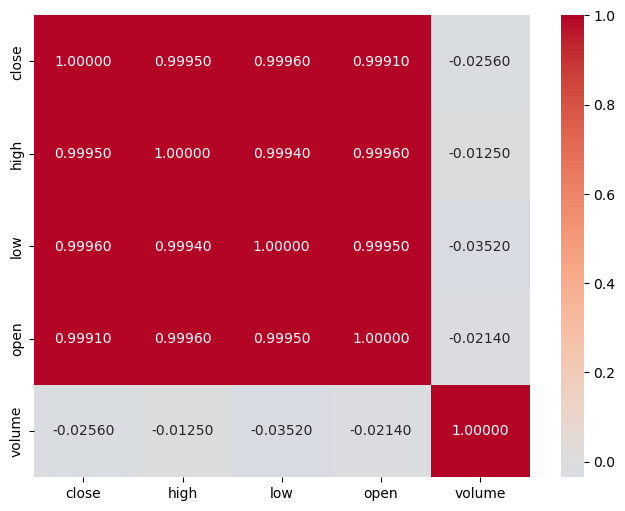

In [20]:
# Calculate correlation with 4 decimal places
corr_matrix = df.corr(numeric_only=True).round(4)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.5f', cmap='coolwarm', center=0)#fmt for digit what we want
plt.show()

# Spilt Data for Testing

In [22]:
# Spliting the dataset

x = df[['open' ,'high', 'low' ,'volume']].values #independent variable
y = df['close'].values #dependent variable

# Spilit the data 80% train and 20% test

In [24]:
from sklearn.model_selection import train_test_split

x_train,y_train,x_test,y_test = train_test_split(x , y ,test_size=0.2 ,  random_state=42)

In [25]:
print(x_train)

[[2.0418400e+03 2.0579900e+03 2.0260700e+03 1.9548160e+06]
 [8.2500000e+02 8.3276500e+02 8.2238010e+02 1.7863210e+06]
 [1.7811844e+03 1.7880650e+03 1.7550000e+03 1.8238360e+06]
 ...
 [1.8101000e+03 1.8219000e+03 1.7962047e+03 1.0963190e+06]
 [1.3000000e+03 1.3100000e+03 1.2957700e+03 1.0858590e+06]
 [1.7981000e+03 1.8356500e+03 1.7894725e+03 1.2220320e+06]]


In [26]:
print(y_train)

[[1.193800e+03 1.199010e+03 1.162000e+03 2.061309e+06]
 [7.506600e+02 7.703600e+02 7.505611e+02 2.134812e+06]
 [7.670000e+02 7.718900e+02 7.631846e+02 9.268830e+05]
 ...
 [1.106300e+03 1.106530e+03 1.099590e+03 9.626960e+05]
 [9.689500e+02 9.715000e+02 9.600100e+02 1.403200e+06]
 [1.204400e+03 1.218200e+03 1.203750e+03 8.671490e+05]]


In [27]:
print(x_test)

[2038.59  831.41 1760.74 ... 1818.55 1298.8  1827.95]


In [28]:
print(y_train)

[[1.193800e+03 1.199010e+03 1.162000e+03 2.061309e+06]
 [7.506600e+02 7.703600e+02 7.505611e+02 2.134812e+06]
 [7.670000e+02 7.718900e+02 7.631846e+02 9.268830e+05]
 ...
 [1.106300e+03 1.106530e+03 1.099590e+03 9.626960e+05]
 [9.689500e+02 9.715000e+02 9.600100e+02 1.403200e+06]
 [1.204400e+03 1.218200e+03 1.203750e+03 8.671490e+05]]


# Training the Model for Linear Prediction

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix , accuracy_score
import statsmodels.api as sm

In [31]:
# Creating Regression Model
LR = LinearRegression()
LR

LinearRegression()

In [32]:
print("Original data shapes:")
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

Original data shapes:
x shape: (1258, 4)
y shape: (1258,)
x_train shape: (1006, 4)
y_train shape: (252, 4)
x_test shape: (1006,)
y_test shape: (252,)


In [33]:
from sklearn.model_selection import train_test_split

# Redo the train-test split properly
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,  # 20% for testing (252 samples)
    random_state=42
)

# Check the shapes - they should be:
print("Fixed shapes:")
print("x_train shape:", x_train.shape)  # Should be (1006, 4)
print("y_train shape:", y_train.shape)  # Should be (1006,)
print("x_test shape:", x_test.shape)    # Should be (252, 4) 
print("y_test shape:", y_test.shape)    # Should be (252,)

Fixed shapes:
x_train shape: (1006, 4)
y_train shape: (1006,)
x_test shape: (252, 4)
y_test shape: (252,)


In [34]:
# Fit linear regression model
Model = LR.fit(x_train , y_train)
Model

LinearRegression()

In [35]:
# For prediction 
y_pred = Model.predict(x_test)
y_pred

array([1172.47905954,  765.79822923,  768.57128641,  759.73217745,
       1484.81410639, 1106.97620218, 1191.95832328, 1498.44568791,
       1776.99459144, 1504.95796035, 1192.58855535, 1511.28760706,
        820.34915623, 1217.51674924, 1711.637462  , 1039.51480532,
       1492.37419094, 1107.16102987, 1101.15451244, 1315.99983242,
       1332.27773317, 1063.89050898,  871.47609189, 1120.3689617 ,
       1604.95701259, 1161.32932965, 1102.26321885,  962.57435193,
       1135.61953369,  784.66740874, 1529.35418434,  958.55065364,
       1759.37346537, 1432.61831264, 1117.95112001, 1057.79170974,
        938.52468958,  930.42734421, 1069.59046144,  813.34177983,
       2292.46637401, 1074.84510002, 1090.27672436,  765.26409287,
       1236.14577602, 1441.90776156,  925.99679565,  732.20254372,
       1070.83990294, 1245.87312677, 1038.48198762,  935.81122068,
       1233.59510228, 1344.7018026 ,  924.99224425,  972.56521855,
        821.54020537,  833.2492202 , 2111.61046011, 1038.07742

# Predicion Table

In [91]:
Pred_Table = LR.predict(x_test)

dframe = pd.DataFrame(y_test , Pred_Table)
dfr = pd.DataFrame({'Actual_Value': y_test , 'Predicted_value': Pred_Table})
print(dfr)

     Actual_Value  Predicted_value
0         1186.48      1172.479060
1          762.02       765.798229
2          769.41       768.571286
3          759.69       759.732177
4         1495.53      1484.814106
..            ...              ...
247        832.15       830.218188
248       1200.96      1197.081777
249       1105.52      1102.425656
250        966.95       964.727719
251       1207.68      1215.298421

[252 rows x 2 columns]


In [93]:
# Create the difference columns first
dfr['diff'] = dfr['Actual_Value'] - dfr['Predicted_value']
dfr

,Actual_Value,Predicted_value,diff
0,1186.48,1172.479060,14.000940
1,762.02,765.798229,-3.778229
2,769.41,768.571286,0.838714
3,759.69,759.732177,-0.042177
4,1495.53,1484.814106,10.715894
...,...,...,...
247,832.15,830.218188,1.931812
248,1200.96,1197.081777,3.878223
249,1105.52,1102.425656,3.094344
250,966.95,964.727719,2.222281


In [39]:
dfr.head(10)

,Actual_Value,Predicted_value,diff
0,1186.48,1172.479060,14.000940
1,762.02,765.798229,-3.778229
2,769.41,768.571286,0.838714
3,759.69,759.732177,-0.042177
4,1495.53,1484.814106,10.715894
5,1102.46,1106.976202,-4.516202
6,1204.80,1191.958323,12.841677
7,1494.49,1498.445688,-3.955688
8,1776.09,1776.994591,-0.904591
9,1500.34,1504.957960,-4.617960


In [40]:
dfr.tail(10)

,Actual_Value,Predicted_value,diff
242,1219.73,1157.624570,62.105430
243,1901.35,1902.295707,-0.945707
244,912.57,912.655212,-0.085212
245,1202.95,1198.300133,4.649867
246,768.79,773.121699,-4.331699
247,832.15,830.218188,1.931812
248,1200.96,1197.081777,3.878223
249,1105.52,1102.425656,3.094344
250,966.95,964.727719,2.222281
251,1207.68,1215.298421,-7.618421


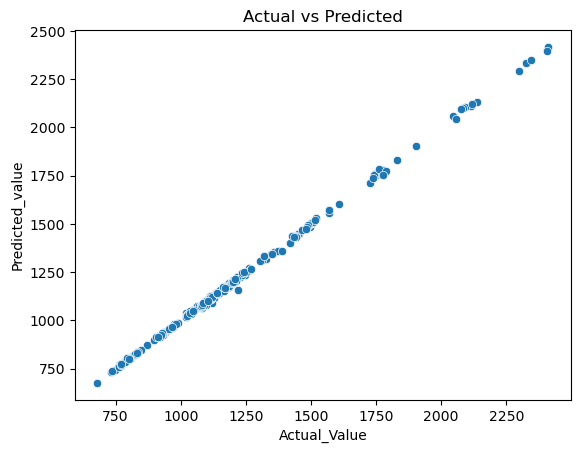

In [41]:
# 1. Most important: Actual vs Predicted
sns.scatterplot(data=dfr, x='Actual_Value', y='Predicted_value')
plt.title('Actual vs Predicted')
plt.show()


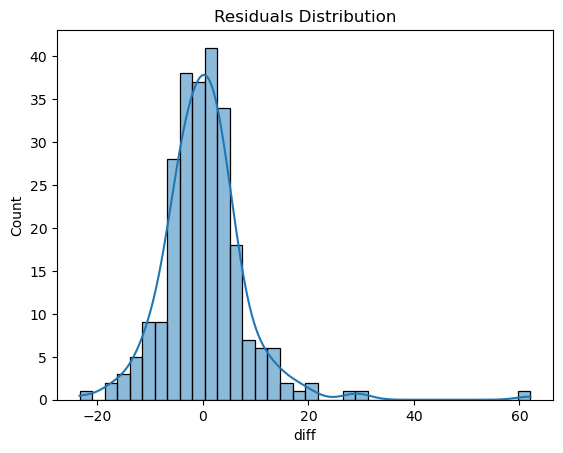

In [42]:

# 2. Residuals distribution
sns.histplot(data=dfr, x='diff',kde=True)
plt.title('Residuals Distribution')
plt.show()

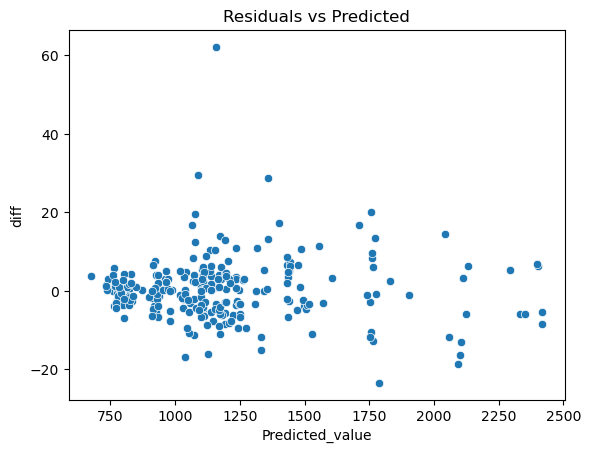

In [52]:
# Residuals scatter
sns.scatterplot(data=dfr, x='Predicted_value', y='diff')
plt.title('Residuals vs Predicted')
plt.show()

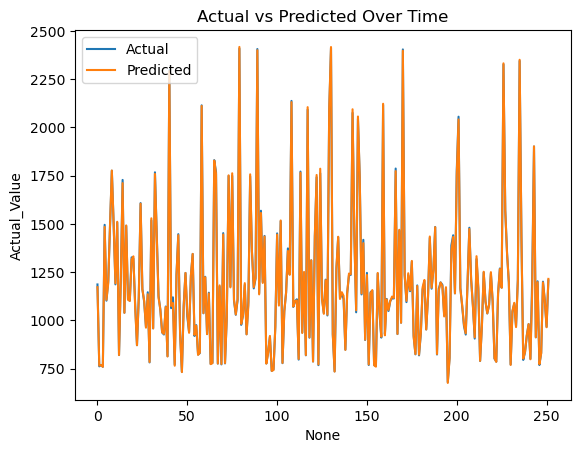

In [57]:
#  Line plot - Actual vs Predicted over index
sns.lineplot(data=dfr, x=dfr.index, y='Actual_Value', label='Actual')
sns.lineplot(data=dfr, x=dfr.index, y='Predicted_value', label='Predicted')
plt.title('Actual vs Predicted Over Time')
plt.show()

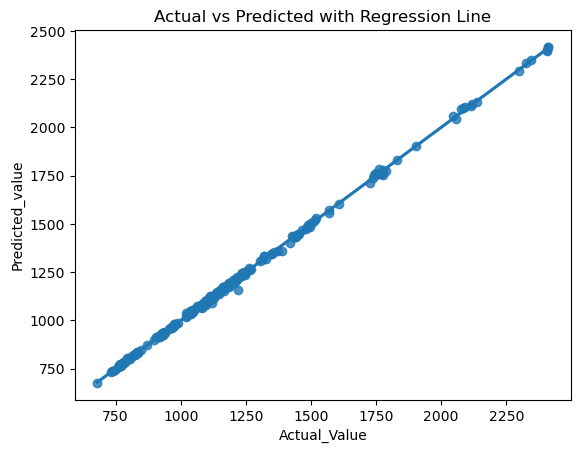

In [59]:
# Regression plot with line
sns.regplot(data=dfr, x='Actual_Value', y='Predicted_value')
plt.title('Actual vs Predicted with Regression Line')
plt.show()

<Axes: >

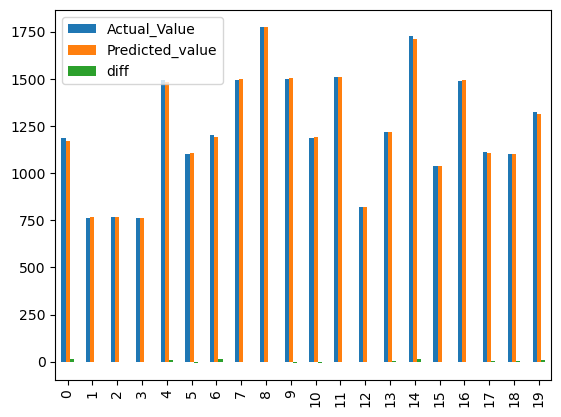

In [62]:
#Graph of the first 20 Values
graph = dfr.head(20)
graph.plot(kind='bar')

<Axes: >

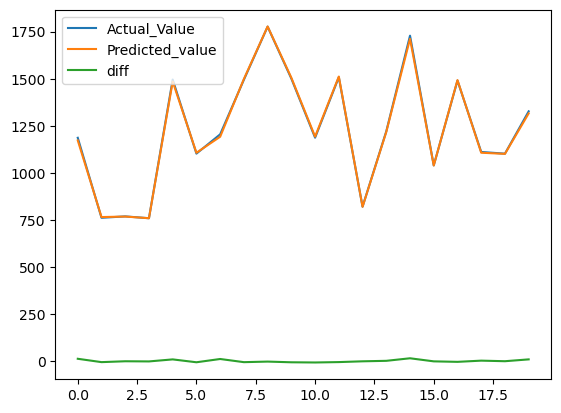

In [64]:
#Graph of the first 20 Values
graph = dfr.head(20)
graph.plot(kind='line')

<Axes: >

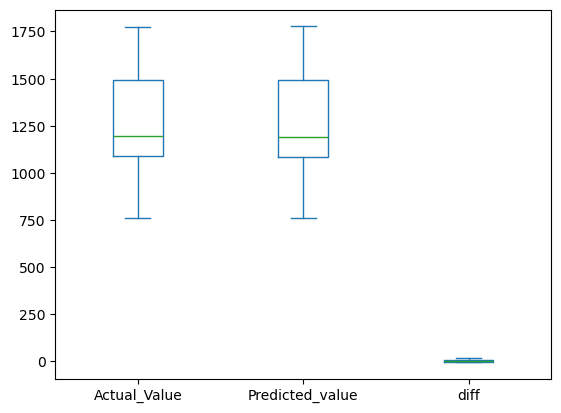

In [66]:
#Graph of the first 20 Values
graph = dfr.head(20)
graph.plot(kind='box')

# Evaluate the Model

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [70]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [72]:
mse

64.5291197208268

In [74]:
mae

5.347499525755419

In [76]:
r2

0.999518095413619

In [109]:
adj_r2 = 1 - (1 - r2) * ((40 - 1) / (40 - 5 - 1))

In [107]:
adj_r2

0.9992482288452457

In [117]:
# Get R² score (already calculated)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

# Adjusted R² calculation
n = x_test.shape[0]  # number of rows in test set
k = x_test.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))

print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")


R²: 0.9995
Adjusted R²: 0.9995
